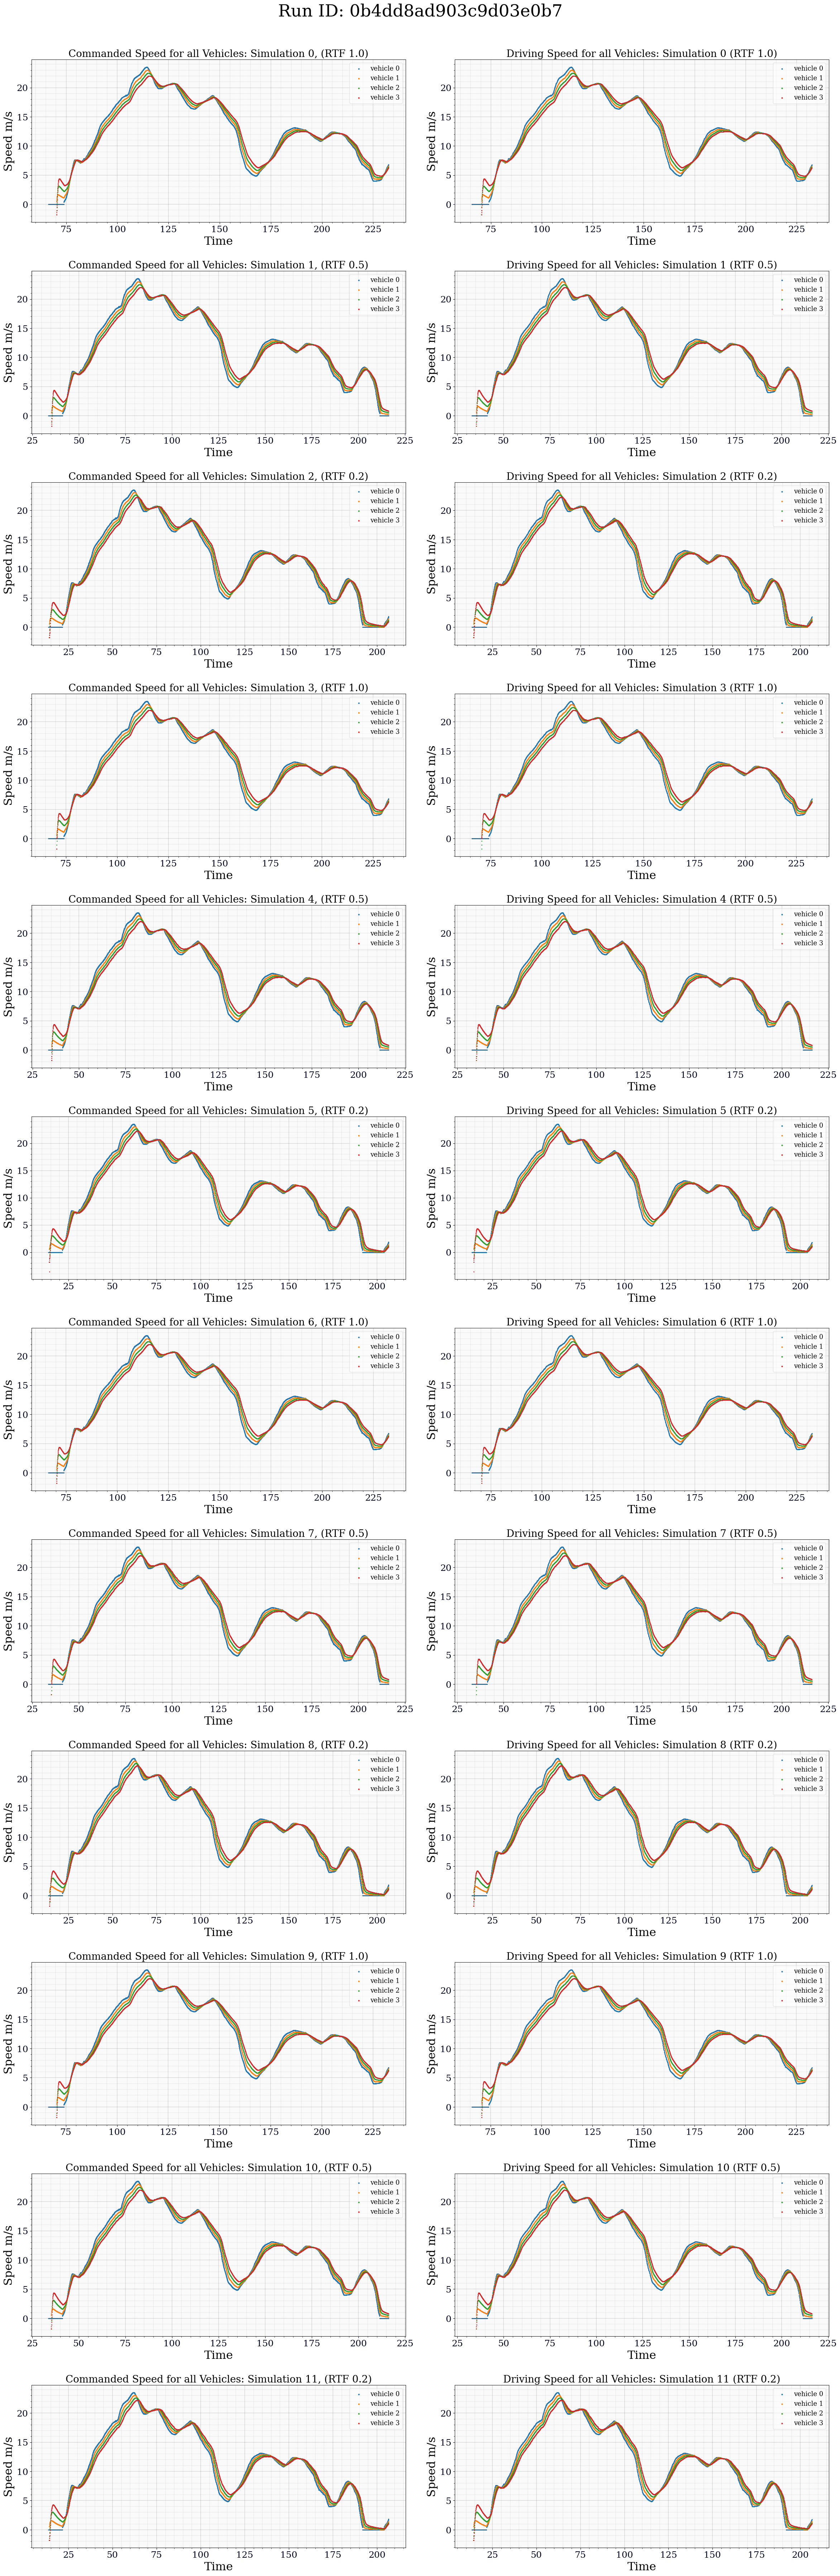

In [2]:
fig, ax = bagpy.create_fig(nrows = len(cmd_speed), ncols = 2 )
ax = ax.reshape(len(cmd_speed), 2 )
for j in range(0, len(cmd_speed)):
    cs = cmd_speed[j]
    s = speed[j]
    ld = lead_dist[j]
    rv = rel_vel[j]
    for i, v in enumerate(cs):
        ax[j, 0].scatter(x = 'Time', y = 'linear.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 0].legend()
        ax[j, 0].set_xlabel('Time')
        ax[j, 0].set_ylabel('Speed m/s')
        ax[j, 0].set_title('Commanded Speed for all Vehicles: Simulation {}, ({})'.format(j, real_time_factor[j]), fontsize = 20)
    for i, v in enumerate(s):
        ax[j, 1].scatter(x = 'Time', y = 'linear.x', data = s[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j, 1].legend()
        ax[j, 1].set_xlabel('Time')
        ax[j, 1].set_ylabel('Speed m/s')
        ax[j, 1].set_title('Driving Speed for all Vehicles: Simulation {} ({})'.format(j, real_time_factor[j]), fontsize = 20)

plt.suptitle("Run ID: {}".format(run_id), y = 1.001)
plt.tight_layout()
plt.savefig(logdir + run_id + '_speed_all_plot.png', bbox_inches='tight')
plt.savefig(logdir + run_id + '_speed_all_plot.pdf', bbox_inches='tight')
plt.show()

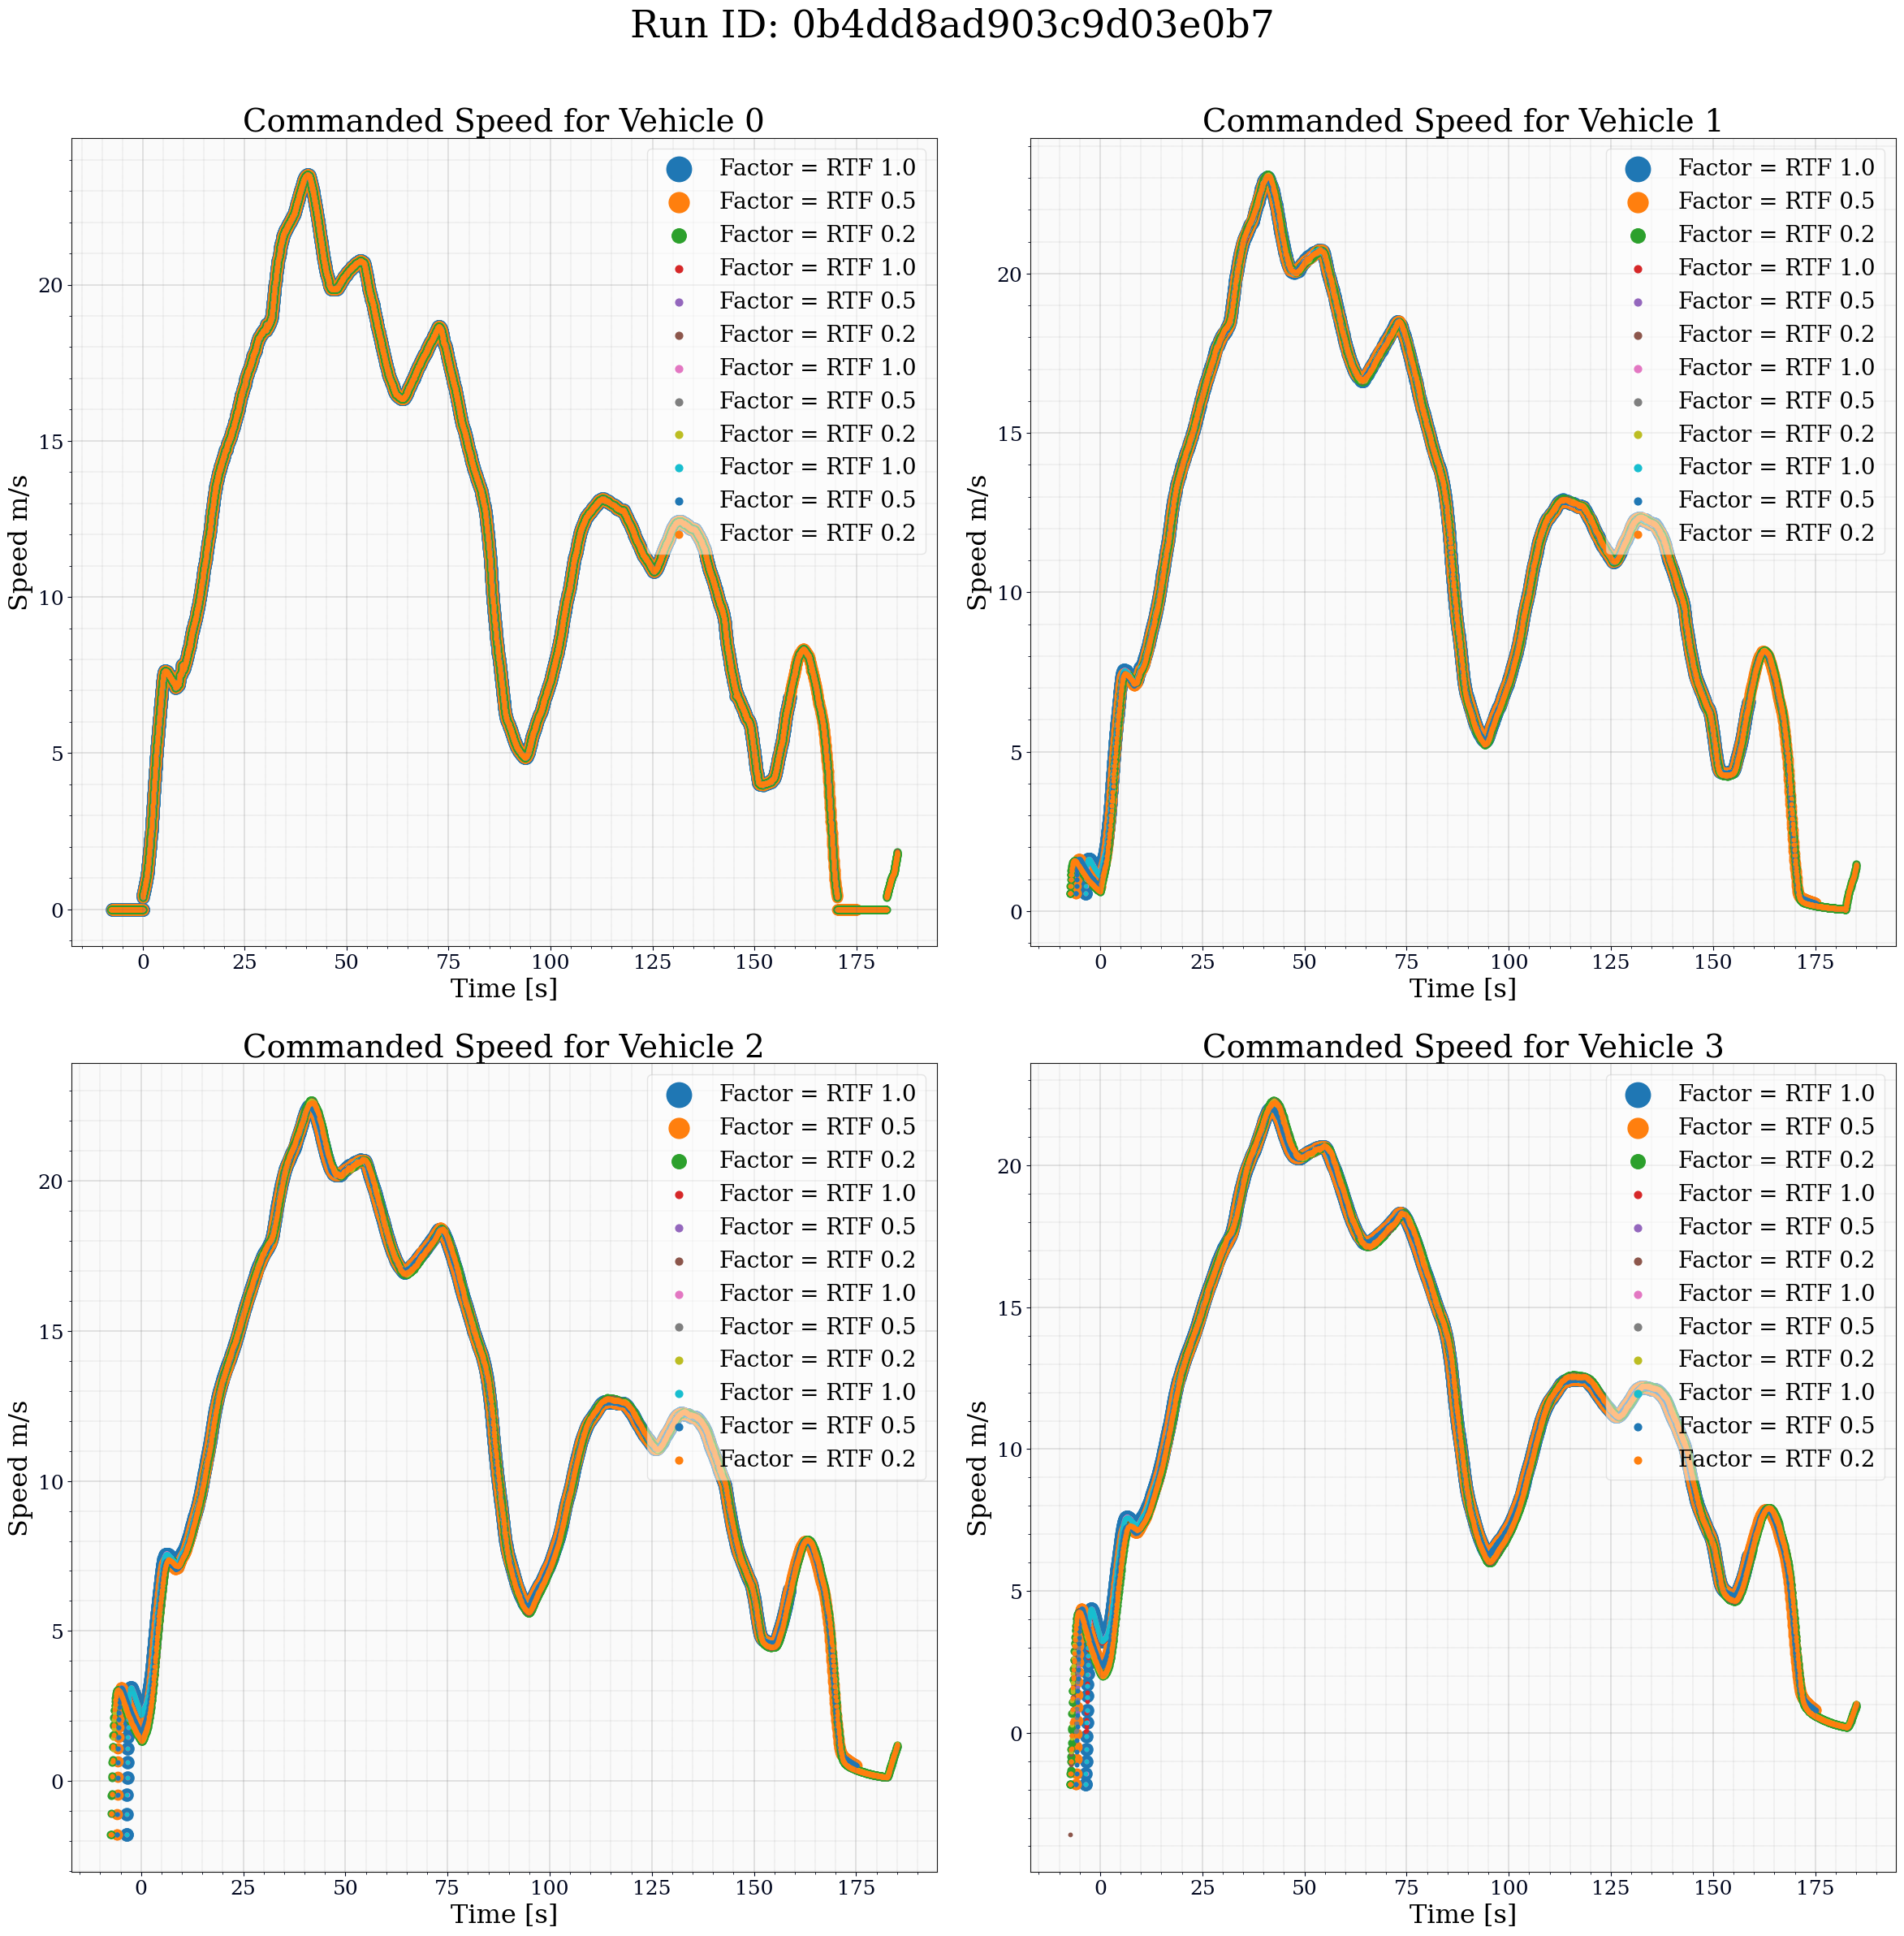

In [3]:
max_car = np.max(N_cars)
figheight = fig.get_figheight()/len(cmd_speed)
fig, ax = bagpy.create_fig(nrows = int(np.ceil(max_car/2)), ncols = 2 )
fig.set_figheight( fig.get_figheight()*2)
ax = ax.ravel()
for j in range(0, len(cmd_speed[0])):
    s_i = 120
    for k in range(0, len(cmd_speed)):
        time = cmd_speed[k][j]['Time'].tolist()
        t0 = cmd_speed[k][0][cmd_speed[k][0]['linear.x'] > 0].iloc[0]['Time']
        ax[j].scatter(x= cmd_speed[k][j]['Time'] - t0, y = cmd_speed[k][j]['linear.x']  ,  s = s_i, label = 'Factor = {}'.format(real_time_factor[k]))
        s_i = s_i - 40
        if(s_i <10):
            s_i = 10
    ax[j].legend(loc='upper right', fontsize = 20)
    ax[j].set_xlabel('Time [s]')
    ax[j].set_ylabel('Speed m/s')
    ax[j].set_title('Commanded Speed for Vehicle {}'.format(j))

plt.suptitle("Run ID: {}".format(run_id), y = 1.001)
plt.tight_layout()
plt.savefig(logdir + run_id + '_speed_overlaid_zero_trimmed.png', bbox_inches='tight')
plt.savefig(logdir + run_id + '_speed_overlaid_zero_trimmed.pdf', bbox_inches='tight')
plt.show()

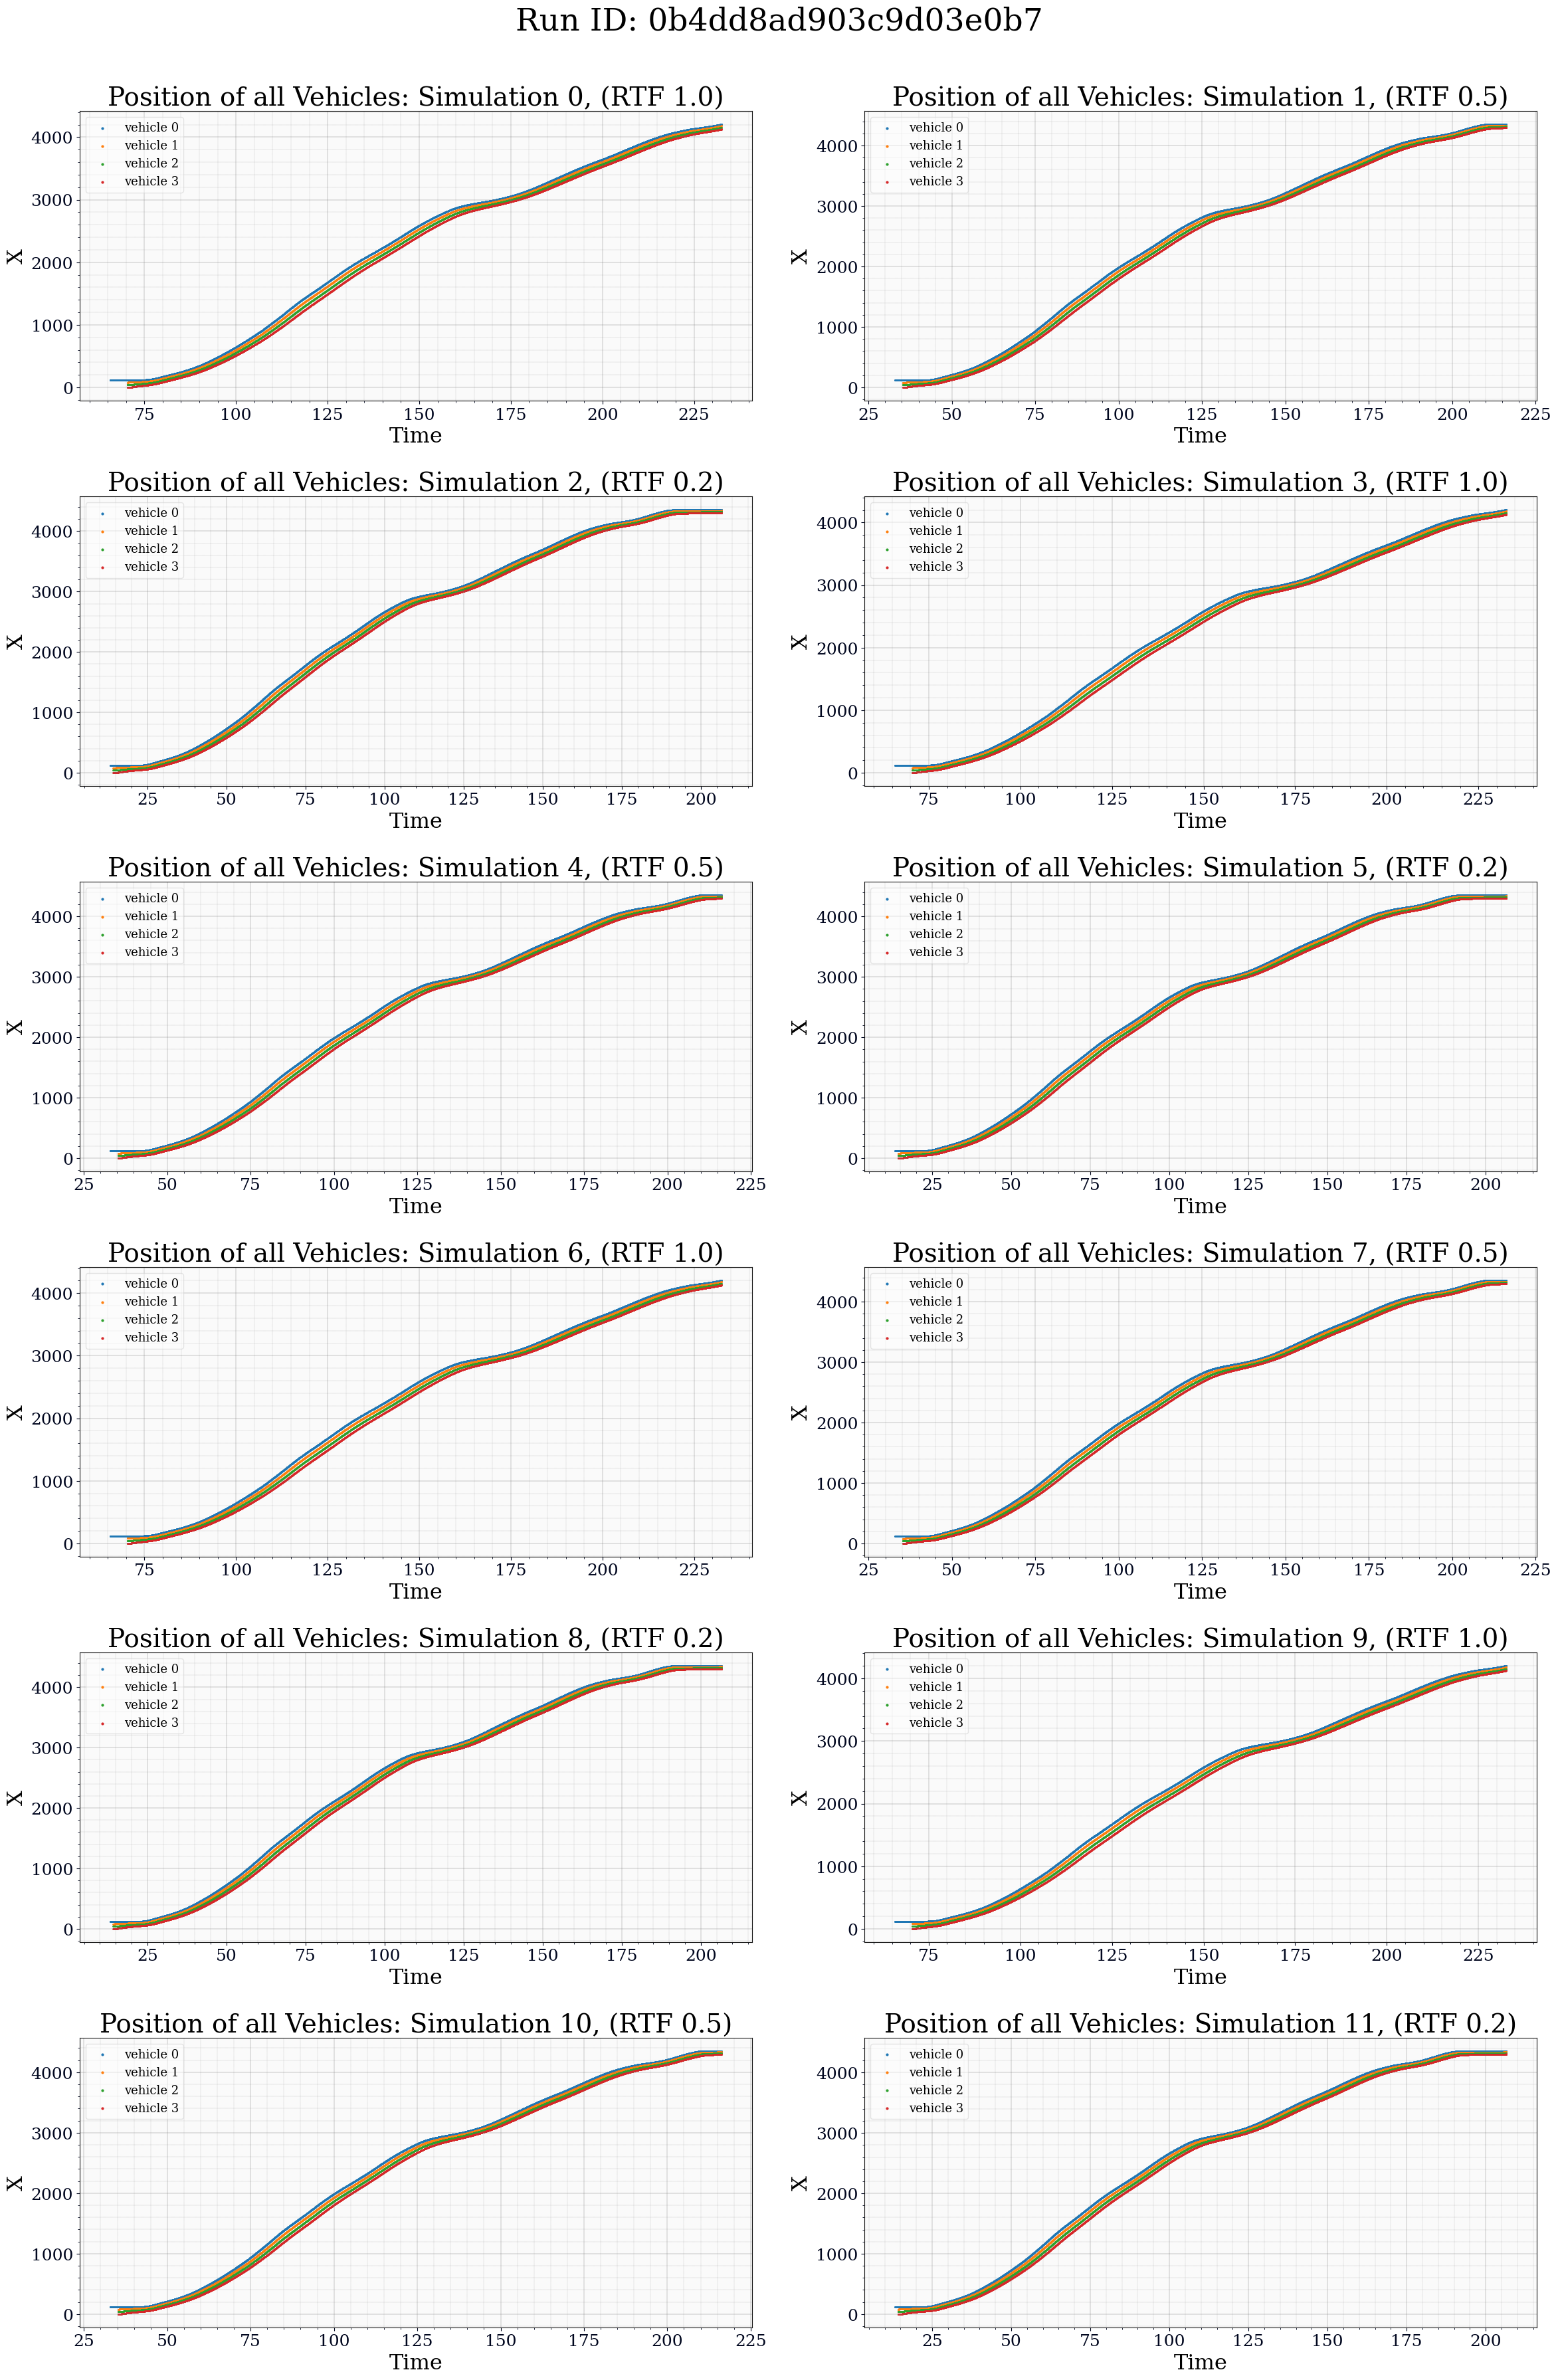

In [4]:
fig, ax = bagpy.create_fig(nrows = int(np.ceil(len(cmd_speed)/2)), ncols = 2 )
ax = ax.ravel()
for j in range(0, len(cmd_speed)):
    cs = posX[j]
    for i, v in enumerate(cs):
        ax[j].scatter(x = 'Time', y = 'pose.pose.position.x', data = cs[i], s = 1, label = 'vehicle {}'.format(i))
        ax[j].legend()
        ax[j].set_xlabel('Time')
        ax[j].set_ylabel('X')
        ax[j].set_title('Position of all Vehicles: Simulation {}, ({})'.format(j, real_time_factor[j]))

plt.suptitle("Run ID: {}".format(run_id), y = 1.0001)
plt.tight_layout()
plt.savefig(logdir + run_id + '_pos_persim_plot.png', bbox_inches='tight')
plt.savefig(logdir + run_id + '_pos_persim_plot.pdf', bbox_inches='tight')
plt.show()

/home/refulgent/VersionControl/sparkle_python/notebooks/sparkle_analysis.py:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



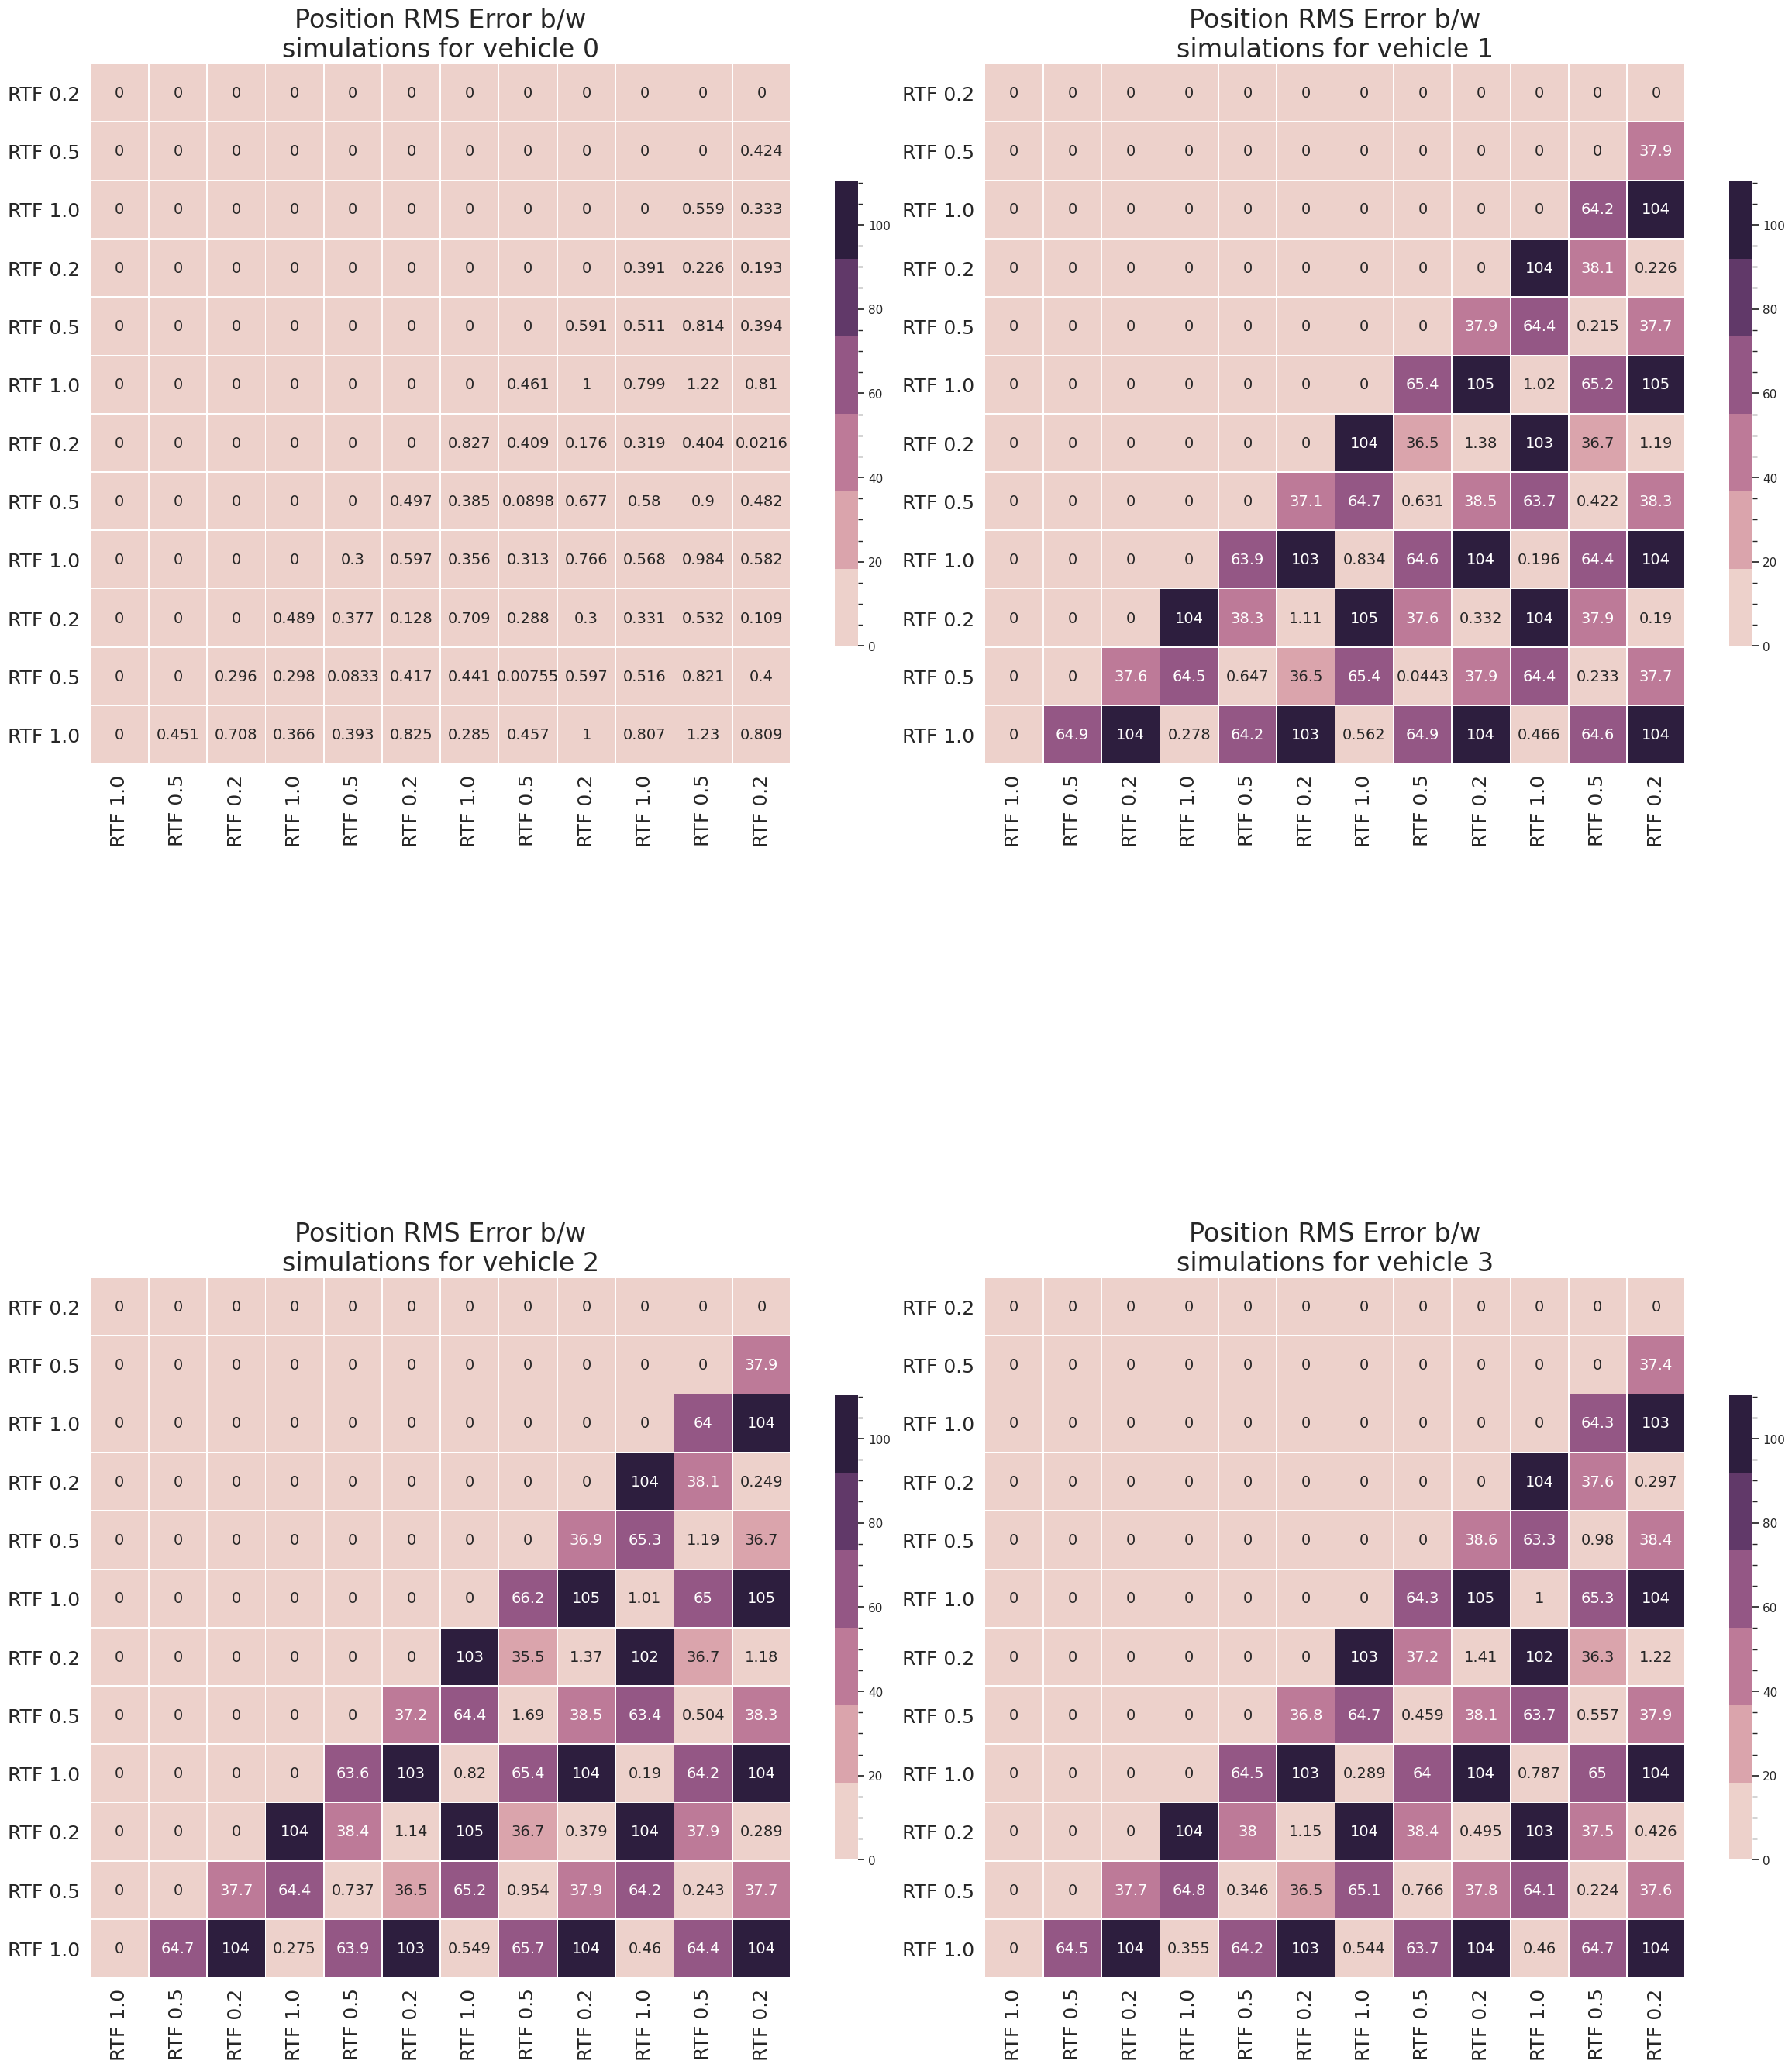

In [6]:
sns.set()
fig2, ax2 = plt.subplots(int(np.ceil(max_car/2)), 2)
ax2 = ax2.ravel()
for vehicle in range(0,len(posX[0])):
    cmap= sns.cubehelix_palette()
    g = sns.heatmap(RMS_Big[vehicle], annot=True, ax = ax2[vehicle], linewidths=.5, xticklabels = real_time_factor, yticklabels=real_time_factor,  square=True,  annot_kws={"size": 14}, cbar_kws={"shrink": .30}, cmap=cmap, vmax=np.max(RMS_Big)*1.05, vmin = 0.0, fmt='.3g')
    g.invert_yaxis()
    ax2[vehicle].set_title('Position RMS Error b/w\nsimulations for vehicle {}'.format(vehicle), fontsize = 24)
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18)
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 18)

fig2.savefig(logdir + run_id + '_pos_rms_veh_plot.png', bbox_inches='tight')
fig2.savefig(logdir + run_id + '_pos_rms_veh_plot.pdf', bbox_inches='tight')
fig2.tight_layout()
fig2.show()

/home/refulgent/VersionControl/sparkle_python/notebooks/sparkle_analysis.py:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



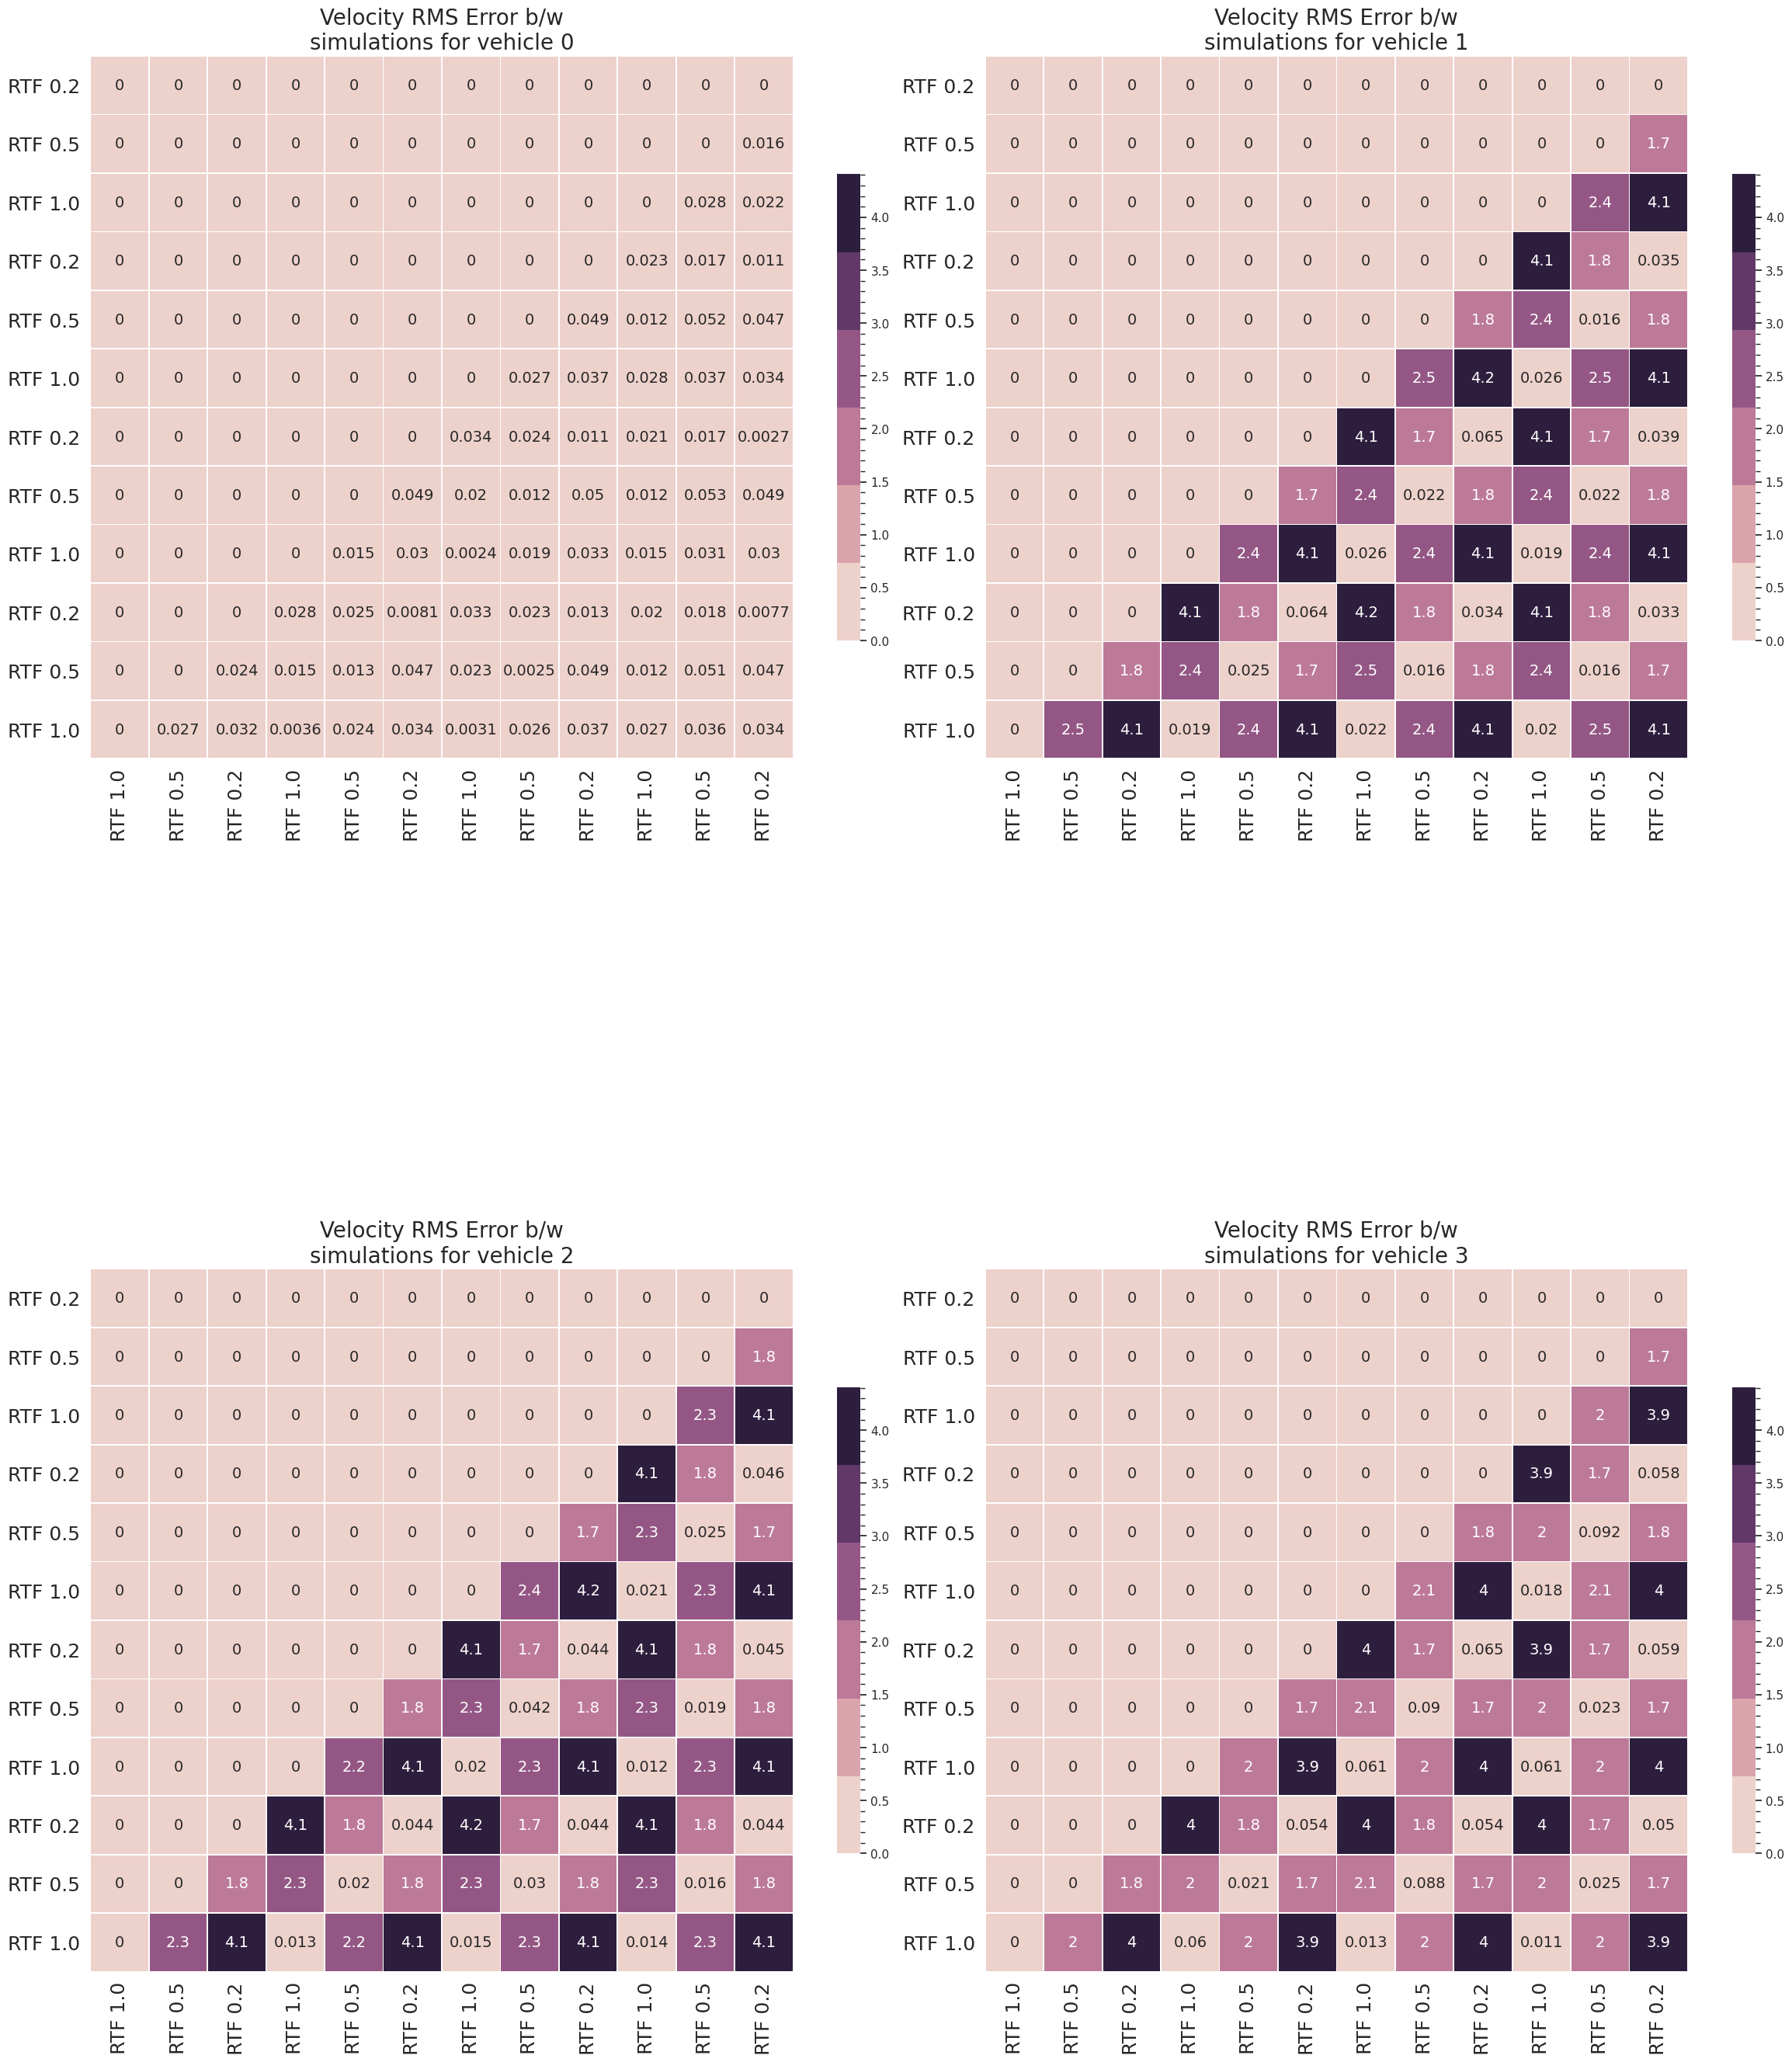

In [8]:
sns.set()
fig2, ax2 = plt.subplots(int(np.ceil(max_car/2)), 2)
ax2 = ax2.ravel()
for vehicle  in range(0,len(speed[0])):
    cmap= sns.cubehelix_palette()
    g = sns.heatmap(RMS_BigV[vehicle], annot=True, ax = ax2[vehicle], linewidths=.5, xticklabels = real_time_factor, yticklabels=real_time_factor, square=True,  annot_kws={"size": 14}, cbar_kws={"shrink": .30}, cmap=cmap, vmax=np.max(RMS_BigV)*1.05, vmin = 0.0, fmt='.2g')
    g.invert_yaxis()
    ax2[vehicle].set_title('Velocity RMS Error b/w\nsimulations for vehicle {}'.format(vehicle), fontsize = 20)
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18)
    g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 18)

fig2.savefig(logdir + run_id + '_velocity_rms_veh_plot.png', bbox_inches='tight')
fig2.savefig(logdir + run_id + '_velocity_rms_veh_plot.pdf', bbox_inches='tight')
fig2.tight_layout()
fig2.show()

In [9]:
bagfiles

['/home/refulgent/Cyverse/sparkle/sparkle_ncars_4_d_bicycle_c_rl_f_1.0_u_20.0_O_True_L_True_G_False_clock_rate_100.0_clockfactor_1.0_recordtime_200.0_dynamics_bicycle_2021-12-11-22-03-04.bag',
 '/home/refulgent/Cyverse/sparkle/sparkle_ncars_4_d_bicycle_c_rl_f_0.5_u_20.0_O_True_L_True_G_False_clock_rate_50.0_clockfactor_0.5_recordtime_200.0_dynamics_bicycle_2021-12-11-22-11-16.bag',
 '/home/refulgent/Cyverse/sparkle/sparkle_ncars_4_d_bicycle_c_rl_f_0.2_u_20.0_O_True_L_True_G_False_clock_rate_20.0_clockfactor_0.2_recordtime_200.0_dynamics_bicycle_2021-12-11-22-22-30.bag',
 '/home/refulgent/Cyverse/sparkle/sparkle_ncars_4_d_bicycle_c_rl_f_1.0_u_20.0_O_True_L_True_G_False_clock_rate_100.0_clockfactor_1.0_recordtime_200.0_dynamics_bicycle_2021-12-11-22-43-35.bag',
 '/home/refulgent/Cyverse/sparkle/sparkle_ncars_4_d_bicycle_c_rl_f_0.5_u_20.0_O_True_L_True_G_False_clock_rate_50.0_clockfactor_0.5_recordtime_200.0_dynamics_bicycle_2021-12-11-22-51-53.bag',
 '/home/refulgent/Cyverse/sparkle/spar